<a href="https://colab.research.google.com/github/shubham-20120/IRIS-flower-classification-using-three-ML-algos/blob/main/crypto_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
dataset_train = pd.read_csv('/content/btc_dataset.csv')
training_set = dataset_train.iloc[:, 2:3].values
temp = [float(i.replace(',', '')) for i in training_set[:, 0]]
training_set = [temp[i] for i in range(len(temp)-1, -1, -1)]
pd.DataFrame(dataset_train).head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 16, 2021","60,536.3","63,605.1","63,605.6","60,476.1",75.95K,-4.81%
1,"Nov 15, 2021","63,597.9","65,514.9","66,311.2","63,439.5",53.53K,-2.92%
2,"Nov 14, 2021","65,508.2","64,397.2","65,508.2","63,608.3",33.98K,1.72%
3,"Nov 13, 2021","64,398.6","64,133.3","64,906.0","63,381.4",30.34K,0.41%
4,"Nov 12, 2021","64,134.5","64,782.6","65,449.7","62,309.7",63.27K,-1.04%


In [3]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.array(training_set).reshape(-1, 1))

In [4]:
trainSize = 0.85
training_set_scaled = np.array([training_set_scaled[i] for i in range(0, int(len(training_set_scaled)*trainSize))])
testing_set_scaled = np.array([training_set_scaled[i] for i in range(int(len(training_set_scaled)*trainSize), len(training_set_scaled))])

In [5]:
len(training_set_scaled), len(testing_set_scaled), len(training_set)

(3519, 528, 4140)

In [12]:
# training
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# testing
X_test = []
y_test = []
for i in range(60, len(testing_set_scaled)):
    X_test.append(testing_set_scaled[i-60:i, 0])
    y_test.append(testing_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
regressor = Sequential()

# 1
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# 2
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# 3
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# 4
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# 5 - output layer 
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# training model
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
109/109 [==============================] - 18s 61ms/step - loss: 3.6440e-04
Epoch 2/100
109/109 [==============================] - 7s 61ms/step - loss: 1.6100e-04
Epoch 3/100
109/109 [==============================] - 7s 61ms/step - loss: 1.4647e-04
Epoch 4/100
109/109 [==============================] - 7s 62ms/step - loss: 1.1209e-04
Epoch 5/100
109/109 [==============================] - 7s 61ms/step - loss: 1.0576e-04
Epoch 6/100
109/109 [==============================] - 7s 61ms/step - loss: 9.8282e-05
Epoch 7/100
109/109 [==============================] - 7s 61ms/step - loss: 1.3928e-04
Epoch 8/100
109/109 [==============================] - 7s 61ms/step - loss: 9.6515e-05
Epoch 9/100
109/109 [==============================] - 7s 61ms/step - loss: 9.3226e-05
Epoch 10/100
109/109 [==============================] - 7s 61ms/step - loss: 7.5894e-05
Epoch 11/100
109/109 [==============================] - 7s 61ms/step - loss: 8.1833e-05
Epoch 12/100
109/109 [==================

In [13]:
pred = sc.inverse_transform(regressor.predict(X_test))

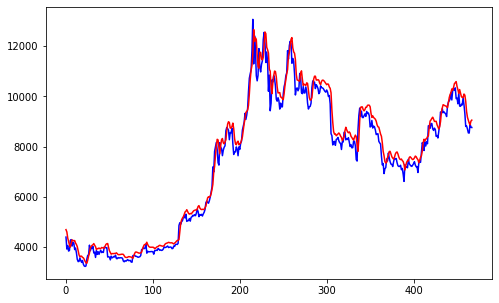

In [16]:
# predicting price of test dataset
plt.figure(figsize=(8, 5))
plt.plot(sc.inverse_transform(y_test.reshape(-1, 1)), c='b') # actual price
plt.plot(pred, c='r') # predicted price